# Homework (18 pts) - Linear Regression

In [46]:
from sklearn import datasets
dataset = datasets.load_boston()
print(dataset.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [61]:
X = dataset.data
y = dataset.target
features = list(dataset.feature_names)

In [62]:
import pandas as pd
df = pd.DataFrame(X, columns=features)
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


1. (3 pts) Standardize the feature data (each column of X) and the target data (y) by centering them on their mean and normalizing by their standard deviation.

In [63]:
Xmu = X.mean(axis=0)
Xstd = X.std(axis=0)
ymu = y.mean()
ystd = y.std()

Xs = (X - Xmu) / Xstd
ys = (y - ymu) / ystd

2. (3 pts) Use pandas to display a table of correlations between each feature in the dataset. Use a color scheme to visually identify highly correlated features. What is the correlation between the two most highly correlated (or anticorrelated) features?

In [64]:
df.corr().style.background_gradient(cmap='cool')

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993


In [65]:
maxcorr = df.corr().loc['RAD', 'TAX']
print(f"The largest correlation ({maxcorr :.2f}) is between RAD and TAX.")

The largest correlation (0.91) is between RAD and TAX.


3. (3 pts) Use seaborn's `pairplot` function to visualize `INDUS` and `AGE` along with the two most highly correlated (or anticorrelated) features identified in #2.

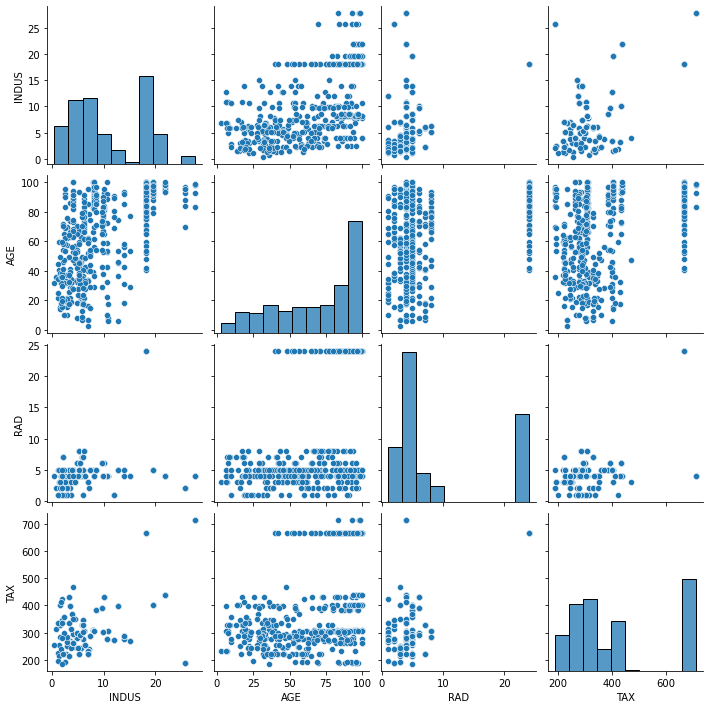

In [66]:
import seaborn as sns

sns.pairplot(df[['INDUS', 'AGE', 'RAD', 'TAX']]);

4. (3 pts) Fit a simple OLS linear regression model to the entire standardized dataset. Should you use a y-intercept or not?

In [67]:
from sklearn.linear_model import LinearRegression

model = LinearRegression(fit_intercept=False)
model.fit(Xs, ys);

5. (3 pts) Show a bar plot of the model coefficients (weights or slopes) for each feature. Put the feature names on the x-axis. Rotate the x-axis labels by 45 degrees and right-align them for visibility. *Hint: see the plt.xticks() function.*

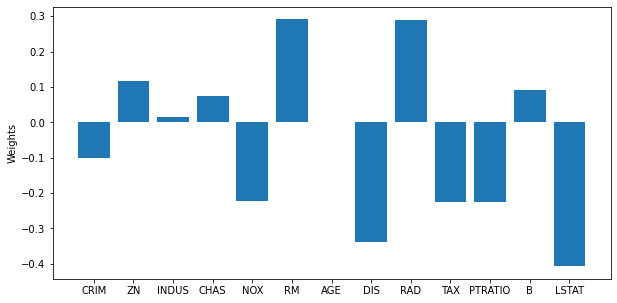

In [68]:
import matplotlib.pyplot as plt

nfeatures = Xs.shape[1]
plt.figure(figsize=(10, 5))
plt.bar(range(nfeatures), model.coef_)
plt.xticks(range(nfeatures), features)#, rotation=45, ha='right')
plt.ylabel('Weights');

6. (3 pts) Repeat #4-#5 above, except leave out one of the most highly correlated features. Which feature has the most influence on median house value?

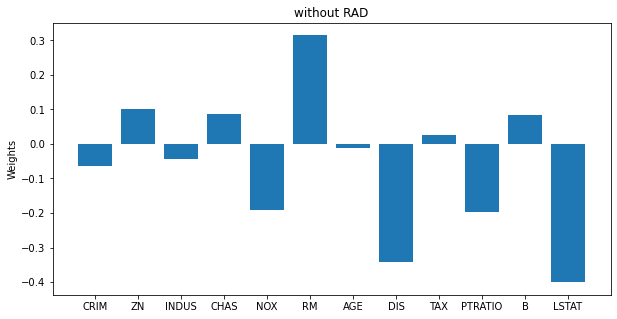

In [70]:
import copy
dfXs = pd.DataFrame(Xs, columns=features)
features2 = copy.copy(features)
features2.remove('RAD') # could also remove TAX
Xs2 = dfXs[features2]

model2 = LinearRegression(fit_intercept=False)
model2.fit(Xs2, ys)

nfeatures = Xs2.shape[1]
plt.figure(figsize=(10, 5))
plt.bar(range(nfeatures), model2.coef_)
plt.xticks(range(nfeatures), features2)#, rotation=45, ha='right')
plt.ylabel('Weights')
plt.title('without RAD');

In [75]:
import numpy as np
ind = np.argmax(np.abs(model2.coef_))
print(f"Median house value depends most strongly on {features2[ind]}")

Median house value depends most strongly on LSTAT
